# Plot bar charts for average task completion times (TCT)

In [1]:
import os
import ast
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

#### Return the legth in ms for a given list of first and lasttimes

In [2]:
def getTaskLength(firstTimes, lastTimes):
    times = []
    for i in range(len(firstTimes)):
        result = int(lastTimes[i])-int(firstTimes[i])
        times.append(result)
    return times

In [3]:
phones = ["S3","S4","OPO","N6"]
tasks = ["Fitts", "WRITE", "READ"]
header = ['Participant','Phone','Cond','Tasks','TaskLengths']

df = pd.read_csv("./out/info.csv", sep = ';')
df = df.drop(df.columns[0], axis=1)
### String representation of lists to list
df["FirstTimes"] = df["FirstTimes"].apply(ast.literal_eval)
df["LastTimes"] = df["LastTimes"].apply(ast.literal_eval)
df["Tasks"] = df["Tasks"].apply(ast.literal_eval)
###calc task lengths for tasks with given list of first and last times
df['TaskLengths'] = df.apply(lambda row: getTaskLength(row['FirstTimes'], row['LastTimes']), axis=1)
df = df[header]
df.to_csv("./out/tasklengths.csv", sep = ";", index=False)
df_walking = df[df['Cond']=='walking']
df_seated = df[df['Cond']=='seated']
df_dict = {"w":df_walking, "s":df_seated}

In [4]:
walking_dict = {"S3":{"Fitts":[],"WRITE":[],"READ":[]},"S4":{"Fitts":[],"WRITE":[],"READ":[]},"OPO":{"Fitts":[],"WRITE":[],"READ":[]},"N6":{"Fitts":[],"WRITE":[],"READ":[]}}
seated_dict = {"S3":{"Fitts":[],"WRITE":[],"READ":[]},"S4":{"Fitts":[],"WRITE":[],"READ":[]},"OPO":{"Fitts":[],"WRITE":[],"READ":[]},"N6":{"Fitts":[],"WRITE":[],"READ":[]}}
for c in ["w","s"]:
    df = df_dict[c]
    for index, row in df.iterrows():
        cond = row["Cond"]
        phone = row["Phone"]
        task_row = row["Tasks"]
        times = row["TaskLengths"]
        for i,t in enumerate(task_row):
            #print(cond,, t)
            task = task_row[i]
            length = times[i]
            if cond == "walking":
                walking_dict[phone][t].append(length)
            else:
                seated_dict[phone][t].append(length)
time_dict = {"w":walking_dict, "s":seated_dict}

#### Generate plots for average task times

Condition: w, Phone: S3, Task: Fitts, Mean: 103.45 (sec), Std: 17.64 (sec)
Condition: w, Phone: S3, Task: WRITE, Mean: 185.42 (sec), Std: 59.59 (sec)
Condition: w, Phone: S3, Task: READ, Mean: 110.14 (sec), Std: 8.75 (sec)
Condition: w, Phone: S4, Task: Fitts, Mean: 102.09 (sec), Std: 14.06 (sec)
Condition: w, Phone: S4, Task: WRITE, Mean: 165.24 (sec), Std: 40.92 (sec)
Condition: w, Phone: S4, Task: READ, Mean: 102.94 (sec), Std: 14.81 (sec)
Condition: w, Phone: OPO, Task: Fitts, Mean: 106.07 (sec), Std: 20.71 (sec)
Condition: w, Phone: OPO, Task: WRITE, Mean: 174.07 (sec), Std: 40.66 (sec)
Condition: w, Phone: OPO, Task: READ, Mean: 96.17 (sec), Std: 28.80 (sec)
Condition: w, Phone: N6, Task: Fitts, Mean: 116.15 (sec), Std: 22.32 (sec)
Condition: w, Phone: N6, Task: WRITE, Mean: 192.82 (sec), Std: 53.99 (sec)
Condition: w, Phone: N6, Task: READ, Mean: 99.76 (sec), Std: 15.99 (sec)
Condition: s, Phone: S3, Task: Fitts, Mean: 106.64 (sec), Std: 18.68 (sec)
Condition: s, Phone: S3, Task

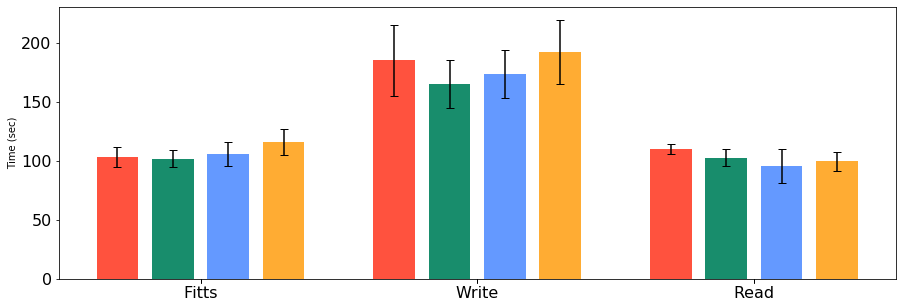

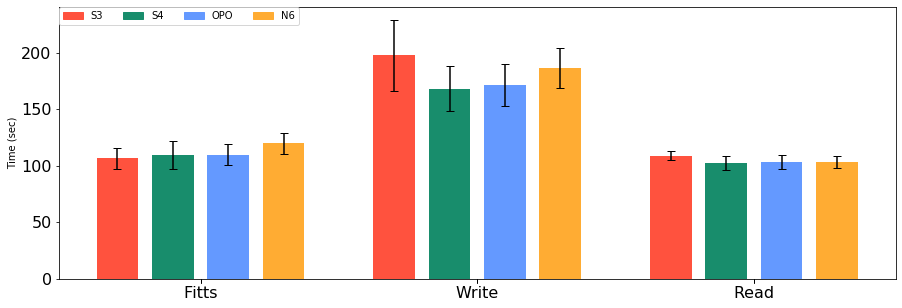

In [5]:
fig = []
ax = []
for i in range(0,2):
    fig1, ax1 = plt.subplots(1, figsize=( 15,5))
    fig.append(fig1)
    ax.append(ax1)

colors = ['#FF523E','#188D6C','#6499FF','#FFAC33']
width= 0.2
patches = []
for i in range(len(colors)):
    patch = mpatches.Patch(color=colors[i], label=phones[i])
    patches.append(patch)
### walk through time_dicts and plot mean and std for every phone and task
for y,c in enumerate(["w","s"]):
    temp_dict = time_dict[c]
    p = 0
    ticks = []
    for phone, task_dict in temp_dict.items():
        for i, t in enumerate(tasks):
            #if c == "w":
             #   ax[y].set_title("Task Lengths Walking")
            #else:
            #    ax[y].set_title("Task Lengths Seated")
            xpos = float(i)+(float(p)*width)
            #print(c, phone, pos)
            times = task_dict[t]
            time_mean = np.mean(times)
            time_std = np.std(times)
            ticks.append(float(i)+1.5*width)
            ax[y].bar(xpos, time_mean/1000, yerr = time_std/1000/2 , width = width-0.05, color = colors[p], capsize = 4)
            print("Condition: %s, Phone: %s, Task: %s, Mean: %s (sec), Std: %s (sec)"%(c, phone, t, "%.2f"%(time_mean/1000),"%.2f"%(time_std/1000)))
        p+=1
    ax[y].set_ylabel("Time (sec)")
    ax[y].set_xticks(ticks)
    ax[y].tick_params(labelsize=16)
    ax[y].set_xticklabels(["Fitts","Write","Read"])
    plt.legend(handles=patches, ncol = 4, loc=2, borderaxespad=0.)